In [237]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [238]:
# load house prices data from datasets\house-prices-advanced-regression-techniques\train.csv

data = pd.read_csv(r'..\datasets\house-prices-advanced-regression-techniques\train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [240]:
def input_preprocess(X) : 
    for column in X.columns : 
        X[column] = X[column].fillna(0)
        if column == 'BsmtQual' or column == 'BsmtCond' : 
            X[column] = X[column].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
        elif column == 'ExterQual' or column == 'ExterCond' or column == 'HeatingQC' or column == 'KitchenQual' :
            X[column] = X[column].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,0:0})
        elif column == 'BsmtExposure':
            X[column] = X[column].map({'Gd':4,'Av':3,'Mn':2,'No':1,0:0})
        elif column =='BsmtFinType1' or column =='BsmtFinType2':
            X[column] = X[column].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,0:0})
        elif column == 'CentralAir' : 
            X[column] = X[column].map({'Y':1,'N':0,0:0})
        elif X[column].dtype != 'int64' and X[column].dtype != 'float64' : 
            X.drop(column, axis=1, inplace=True)

In [241]:
# get data X as features and Y as target 
data = data.fillna(0) 
y = data['SalePrice']
X = data.drop(['Id','SalePrice'], axis=1)
input_preprocess(X) 
print(len(data.columns))
print(len(X.columns))

81
46


In [242]:
# divide the training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


# train a linear regression model froms sklearn 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# evaluate the model


(1168, 46) (292, 46)
(1168,) (292,)


RMSLE: 0.1616509776466547
R2: 0.8486051883104364


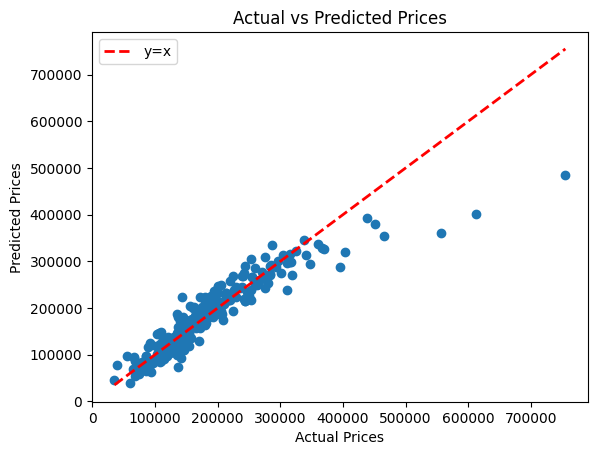

In [243]:

from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSLE: {rmsle}")
print(f"R2: {r2}")
# plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y=x')
plt.legend()
plt.show()

In [244]:
test_data = pd.read_csv('../datasets/house-prices-advanced-regression-techniques/test.csv')
test_data = test_data.fillna(0)
input_preprocess(test_data)
test_X = test_data[X.columns]
test_pred = model.predict(test_X)
print(test_pred)
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)

[115061.49959608 159094.46608501 166623.77458084 ... 163615.60862726
 121355.24675789 240699.05858747]
